In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv("IMDB Dataset.csv")
df.shape

(50000, 2)

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Lowercasing the df
df['review']=df['review'].str.lower()

In [5]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [6]:
df.isnull().mean()*100

review       0.0
sentiment    0.0
dtype: float64

In [7]:
df.duplicated().sum()

418

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(49582, 2)

In [10]:
# Removing the trailing spaces:
df['review']=df['review'].str.strip()
df['review'].apply(lambda x:x.startswith(' ') or x.endswith(' ')).sum()

0

In [11]:
# Removing html tags using regular expression:
tags=re.compile(r'<.*?>')
df['review']=df['review'].str.replace(tags,'',regex=True)

In [12]:
# Removing the \n:
trailing_spaces= df[df['review'].str.contains('\n', ' ', regex=True)]
trailing_spaces

,review,sentiment


In [13]:
label=LabelEncoder()

In [14]:
df['sentiment']=label.fit_transform(df['sentiment'])

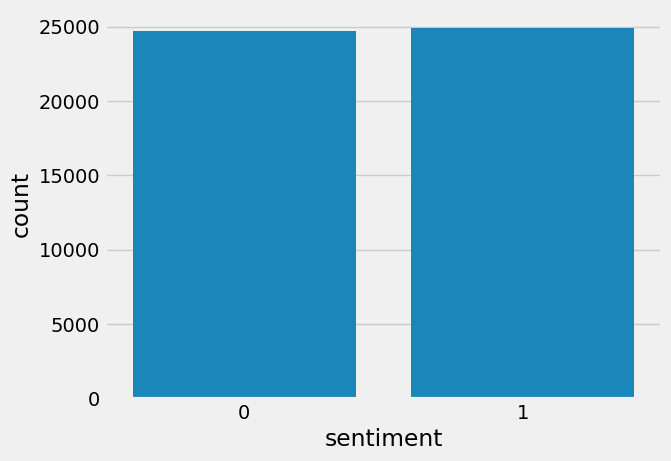

In [21]:
sns.countplot(data=df,x='sentiment')

plt.show()

In [16]:
df['word_count']=df['review'].apply(lambda x:len(x.split()))

In [17]:
df['word_count'].describe()

count    49582.000000
mean       227.302005
std        168.472856
min          4.000000
25%        125.000000
50%        171.000000
75%        276.000000
max       2450.000000
Name: word_count, dtype: float64

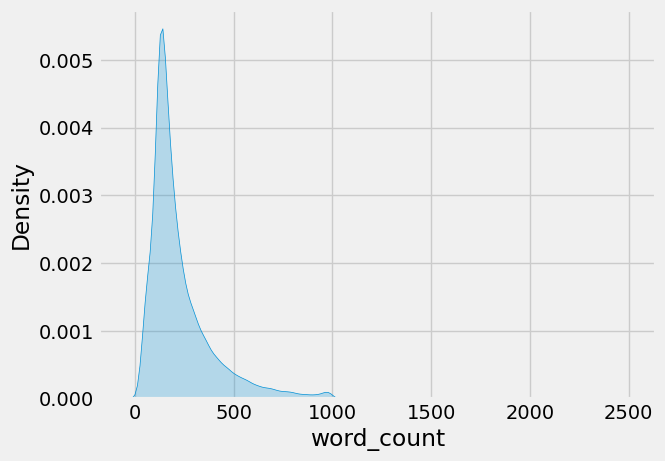

In [18]:
sns.kdeplot(data=df,x='word_count',fill=True)
plt.show()

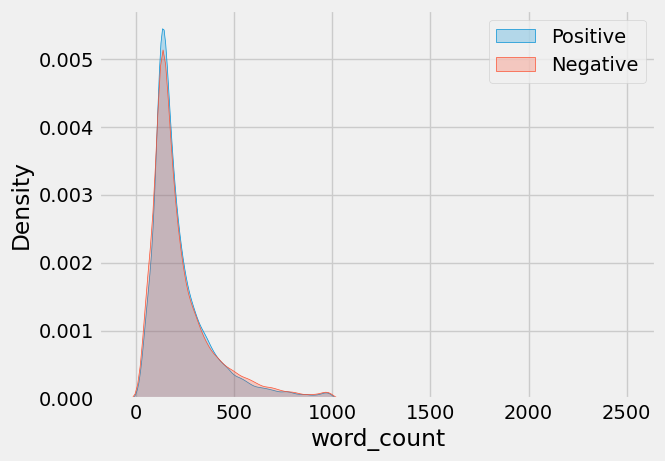

In [19]:
sns.kdeplot(df[df['sentiment']==0]['word_count'],fill=True,label="Positive")
sns.kdeplot(df[df['sentiment']==1]['word_count'],fill=True,label="Negative")

plt.legend()
plt.show()